|| Convolutional Neural Network, Deep Learning and Machine Learning Project || 
 By: Alind Singh (R00224088)

In the Convolutional Neural Network section, we'll set up 3 Keras models as examples that are mentioned in the report.
First, we'll start with the 2D input with 1D conv operation:

In [12]:
from keras.models import Sequential
from keras.layers import Conv1D

model = Sequential()

#Add a 1D convolutional layer with 32 filters, kernel size of 3, ReLU activation function
model.add(Conv1D(32, kernel_size=3, activation='relu',input_shape=(28,1)))

#Print the summary of the model to check the number of parameters
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 26, 32)            128       
                                                                 
Total params: 128
Trainable params: 128
Non-trainable params: 0
_________________________________________________________________


Next, it's a model that has 3D input with 2D convolutional layer:

In [13]:
from keras.layers import Conv2D

model = Sequential()

#Add a 2D convolutional layer with 16 filters, kernel size of 5x5, ReLU activation function
model.add(Conv2D(16,kernel_size=(5,5),activation='relu',input_shape=(32,32,3)))

#Print the model to check the number of parameters
model.summary() 

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        1216      
                                                                 
Total params: 1,216
Trainable params: 1,216
Non-trainable params: 0
_________________________________________________________________


Now we will look at a model that has 2D input with a 3D convolutional layer:

In [31]:
from keras.layers import Conv3D

model = Sequential()

#Add a 3D convolutional layer with 64 filters, kernel size of 4x4x4, ReLU activation function
model.add(Conv3D(64,kernel_size=(4,4,4),activation='relu',input_shape=(20,20,5,5)))

#Print the model to check the number of parameters in the layer
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_20 (Conv3D)          (None, 17, 17, 2, 64)     20544     
                                                                 
Total params: 20,544
Trainable params: 20,544
Non-trainable params: 0
_________________________________________________________________


In the Deep Learning section; we analyse the Kvasir-Dataset containing sub-classes of images of the gastro infection in several patients.
We'll first split the data in 70:15:15 ratio. 
The code for spliting the dataset into training, validation and test sets, is different than the one available on GitHub.
We'll be using train_test_split() function of the sklearn library.

In [2]:
import os
import shutil
import glob
from sklearn.model_selection import train_test_split

data_dir = 'kvasir-dataset-v2'

sub_dir = ['dyed-lifted-polyps',
           'dyed-resection-margins',
           'esophagitis','normal-cecum',
           'normal-pylorus','normal-z-line',
           'polyps',
           'ulcerative-colitis']

train_set_dir = os.path.join(data_dir,'train')
val_set_dir = os.path.join(data_dir,'validation')
test_set_dir = os.path.join(data_dir,'test')
    
os.makedirs(train_set_dir)  
os.makedirs(val_set_dir)
os.makedirs(test_set_dir)

for d in sub_dir:
    img_path = os.path.join(data_dir, d)
    images = glob.glob(img_path + '/*.jpg')
              
    train, test = train_test_split(images,train_size=0.7)
    test, validation = train_test_split(test,test_size=0.5)
    print(f"{len(train)} Images in training set for '{d}'")
    print(f"{len(validation)} Images in validation set for '{d}'")
    print(f"{len(test)} Images in test set for '{d}'\n")
    for image in train:
        if not os.path.exists(os.path.join(train_set_dir, d)):
            os.makedirs(os.path.join(train_set_dir, d))
        shutil.move(image, os.path.join(train_set_dir, d))

    for image in test:
        if not os.path.exists(os.path.join(test_set_dir, d)):
            os.makedirs(os.path.join(test_set_dir, d))
        shutil.move(image, os.path.join(test_set_dir, d))

    for image in validation:
        if not os.path.exists(os.path.join(val_set_dir, d)):
            os.makedirs(os.path.join(val_set_dir, d))
        shutil.move(image, os.path.join(val_set_dir, d))    

700 Images in training set for 'dyed-lifted-polyps'
150 Images in validation set for 'dyed-lifted-polyps'
150 Images in test set for 'dyed-lifted-polyps'

700 Images in training set for 'dyed-resection-margins'
150 Images in validation set for 'dyed-resection-margins'
150 Images in test set for 'dyed-resection-margins'

700 Images in training set for 'esophagitis'
150 Images in validation set for 'esophagitis'
150 Images in test set for 'esophagitis'

700 Images in training set for 'normal-cecum'
150 Images in validation set for 'normal-cecum'
150 Images in test set for 'normal-cecum'

700 Images in training set for 'normal-pylorus'
150 Images in validation set for 'normal-pylorus'
150 Images in test set for 'normal-pylorus'

700 Images in training set for 'normal-z-line'
150 Images in validation set for 'normal-z-line'
150 Images in test set for 'normal-z-line'

700 Images in training set for 'polyps'
150 Images in validation set for 'polyps'
150 Images in test set for 'polyps'

700 I

Now, we will train a CNN model on the training dataset, validate the model using the validation dataset and then test out it's performance using the test dataset.

Found 5600 images belonging to 8 classes.
Found 1200 images belonging to 8 classes.
Found 1200 images belonging to 8 classes.
Epoch 1/50
175/175 [==============================] - 423s 2s/step - loss: 1.2182 - accuracy: 0.4825 - val_loss: 0.7902 - val_accuracy: 0.6410
Epoch 2/50
175/175 [==============================] - 332s 2s/step - loss: 0.8323 - accuracy: 0.6162 - val_loss: 0.7669 - val_accuracy: 0.6512
Epoch 3/50
175/175 [==============================] - 368s 2s/step - loss: 0.7434 - accuracy: 0.6577 - val_loss: 0.6991 - val_accuracy: 0.6588
Epoch 4/50
175/175 [==============================] - 354s 2s/step - loss: 0.7047 - accuracy: 0.6712 - val_loss: 0.7027 - val_accuracy: 0.6816
Epoch 5/50
175/175 [==============================] - 356s 2s/step - loss: 0.6796 - accuracy: 0.6775 - val_loss: 0.6354 - val_accuracy: 0.7044
Epoch 6/50
175/175 [==============================] - 349s 2s/step - loss: 0.6713 - accuracy: 0.6779 - val_loss: 0.6166 - val_accuracy: 0.7306
Epoch 7/50
175/1

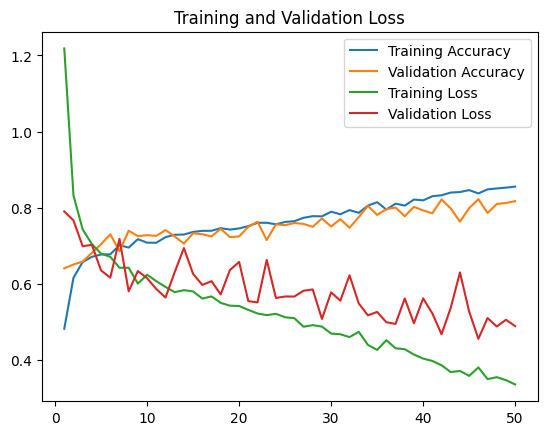

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

np.random.seed(88)
tf.random.set_seed(88)

img_width, img_height = 224,224
batch_size = 32

train_data_generator = ImageDataGenerator(
    rescale= 1./255,
    shear_range= 0.2,
    zoom_range= 0.2,
    horizontal_flip=True,
    vertical_flip=True
)
val_data_generator = ImageDataGenerator(rescale= 1./255)
test_data_generator = ImageDataGenerator(rescale= 1./255)

train_generator = train_data_generator.flow_from_directory(
    train_set_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'categorical'
)
val_generator = val_data_generator.flow_from_directory(
    val_set_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'categorical'
)
test_generator = test_data_generator.flow_from_directory(
    test_set_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'categorical'
)
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(img_width,img_height,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.n//train_generator.batch_size,
    epochs=50,
    validation_data=val_generator,
    validation_steps=val_generator.n//val_generator.batch_size
)

test_loss, test_acc = model.evaluate(test_generator, verbose = 2)
print("Training Accuracy for the model: ",history.history['accuracy'])
print("Validation Accuracy for the model: ",history.history['val_accuracy'])
print("Test Accuracy for the model: ",test_acc)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,label='Training Accuracy')
plt.plot(epochs,val_acc,label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.plot(epochs,loss,label='Training Loss')
plt.plot(epochs,val_loss,label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

The graph plot is a little confusing to visualize, so we can use the performance metrics again to plot separate graphs.

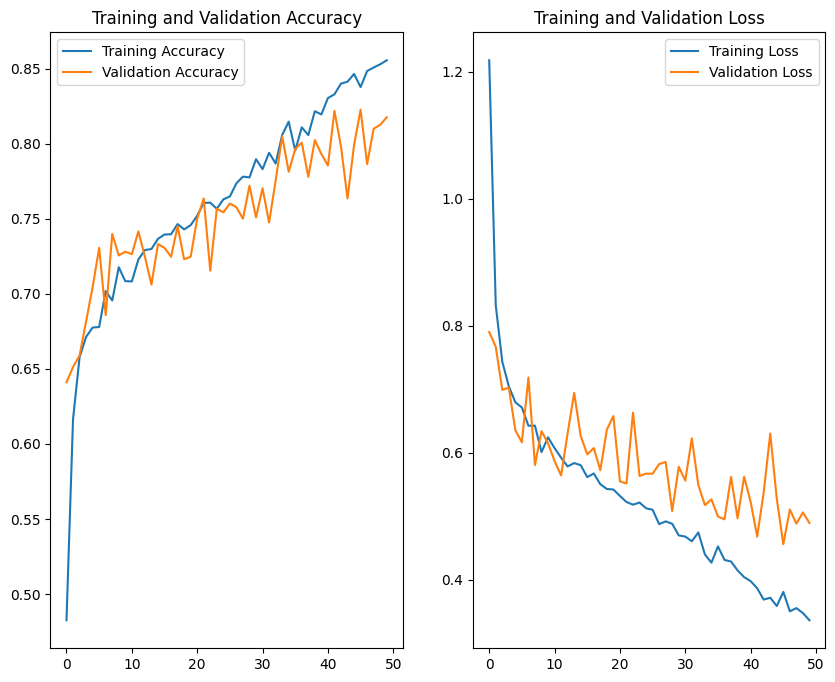

In [4]:
epochs = range(len(acc))

plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.plot(epochs,acc,label='Training Accuracy')
plt.plot(epochs,val_acc,label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs,loss,label='Training Loss')
plt.plot(epochs,val_loss,label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

Next, we will change some of the model parameters to check how does it effects the performance. We’ll reduce the number of layers to 2 and the number of filters in each convolutional layer to 16 and 32, respectively. We’ll train the model for 15 epochs now. The number of nodes remain the same, along with the same value of the batch size.

In [6]:
up_model = Sequential()
up_model.add(Conv2D(16,(3,3),activation='relu',input_shape=(img_width,img_height,3)))
up_model.add(MaxPooling2D((2,2)))
up_model.add(Conv2D(32,(3,3),activation='relu'))
up_model.add(MaxPooling2D((2,2)))
up_model.add(Flatten())
up_model.add(Dense(512,activation='relu'))
up_model.add(Dropout(0.5))
up_model.add(Dense(8,activation='softmax'))

up_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

up_history = up_model.fit(
    train_generator,
    steps_per_epoch = train_generator.n//train_generator.batch_size,
    epochs=15,
    validation_data=val_generator,
    validation_steps=val_generator.n//val_generator.batch_size
)

up_test_loss, up_test_acc = up_model.evaluate(test_generator, verbose = 2)
print("Training Accuracy for the updated model: ",up_history.history['accuracy'])
print("Validation Accuracy for the updated model: ",up_history.history['val_accuracy'])
print("Test Accuracy for the updated model: ",up_test_acc)

up_acc = up_history.history['accuracy']
up_val_acc = up_history.history['val_accuracy']
up_loss = up_history.history['loss']
up_val_loss = up_history.history['val_loss']

Epoch 1/15
175/175 [==============================] - 271s 2s/step - loss: 1.2173 - accuracy: 0.5241 - val_loss: 0.7587 - val_accuracy: 0.6250
Epoch 2/15
175/175 [==============================] - 365s 2s/step - loss: 0.8028 - accuracy: 0.6259 - val_loss: 0.7631 - val_accuracy: 0.6410
Epoch 3/15
175/175 [==============================] - 356s 2s/step - loss: 0.7606 - accuracy: 0.6489 - val_loss: 0.7140 - val_accuracy: 0.6748
Epoch 4/15
175/175 [==============================] - 355s 2s/step - loss: 0.7094 - accuracy: 0.6675 - val_loss: 0.6408 - val_accuracy: 0.7196
Epoch 5/15
175/175 [==============================] - 355s 2s/step - loss: 0.6820 - accuracy: 0.6921 - val_loss: 0.7296 - val_accuracy: 0.6588
Epoch 6/15
175/175 [==============================] - 364s 2s/step - loss: 0.6919 - accuracy: 0.6802 - val_loss: 0.6171 - val_accuracy: 0.7188
Epoch 7/15
175/175 [==============================] - 367s 2s/step - loss: 0.6652 - accuracy: 0.6891 - val_loss: 0.6056 - val_accuracy: 0.7340

Now we can visualize the training curves of the updated model.

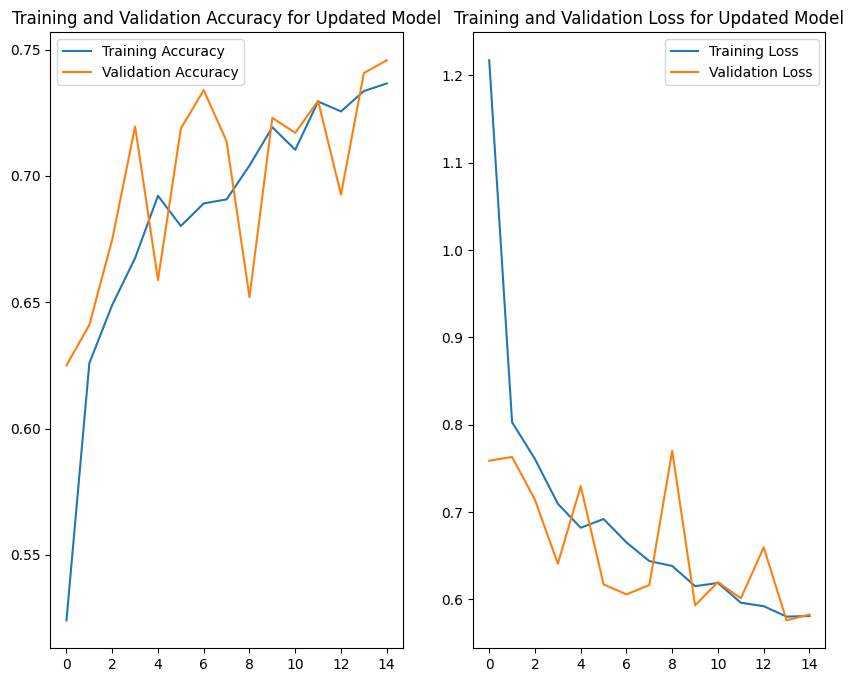

In [7]:
epochs = range(len(up_acc))

plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.plot(epochs,up_acc,label='Training Accuracy')
plt.plot(epochs,up_val_acc,label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy for Updated Model')

plt.subplot(1,2,2)
plt.plot(epochs,up_loss,label='Training Loss')
plt.plot(epochs,up_val_loss,label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss for Updated Model')
plt.show()

Now, we will implement some other concepts of deep learning in our model and analyze the new results.
The concepts we will implement together here are called "Transfer Learning" and "Image Resizing".
In transfer learning, we'll train a model on a large image dataset, add our own connected layers and then fine tune it on our data generators.
For implementing image resizing, we will use new dimensions for input and target size. Earlier we used (224,224) and now we'll use (250,250). 

In [9]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

vgg = VGG16(weights='imagenet',include_top=False,input_shape=(250,250,3))

new_train_generator = train_data_generator.flow_from_directory(
    train_set_dir,
    target_size = (250, 250),
    batch_size = batch_size,
    class_mode = 'categorical'
)
new_val_generator = val_data_generator.flow_from_directory(
    val_set_dir,
    target_size = (250, 250),
    batch_size = batch_size,
    class_mode = 'categorical'
)
new_test_generator = test_data_generator.flow_from_directory(
    test_set_dir,
    target_size = (250, 250),
    batch_size = batch_size,
    class_mode = 'categorical'
)

for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
x = Dense(256,activation='relu')(x)
x = Dense(128,activation='relu')(x)
predictions = Dense(8,activation='softmax')(x)

new_model = Model(inputs=vgg.input, outputs=predictions)

new_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

new_history = new_model.fit(
    new_train_generator, 
    steps_per_epoch=new_train_generator.n//new_train_generator.batch_size,
    epochs=10,
    validation_data=new_val_generator,
    validation_steps=new_val_generator.n//new_val_generator.batch_size
    )

new_test_loss, new_test_acc = new_model.evaluate(new_test_generator, verbose = 2)
print("Training Accuracy for the new model: ",new_history.history['accuracy'])
print("Validation Accuracy for the new model: ",new_history.history['val_accuracy'])
print("Test Accuracy for the new model: ",new_test_acc)

new_acc = new_history.history['accuracy']
new_val_acc = new_history.history['val_accuracy']
new_loss = new_history.history['loss']
new_val_loss = new_history.history['val_loss']

Found 5600 images belonging to 8 classes.
Found 1200 images belonging to 8 classes.
Found 1200 images belonging to 8 classes.
Epoch 1/10
175/175 [==============================] - 1804s 10s/step - loss: 1.0006 - accuracy: 0.6116 - val_loss: 0.7382 - val_accuracy: 0.7078
Epoch 2/10
175/175 [==============================] - 1820s 10s/step - loss: 0.6405 - accuracy: 0.7364 - val_loss: 0.6667 - val_accuracy: 0.7416
Epoch 3/10
175/175 [==============================] - 1745s 10s/step - loss: 0.5418 - accuracy: 0.7748 - val_loss: 0.5329 - val_accuracy: 0.7956
Epoch 4/10
175/175 [==============================] - 1730s 10s/step - loss: 0.5118 - accuracy: 0.7879 - val_loss: 0.4823 - val_accuracy: 0.8083
Epoch 5/10
175/175 [==============================] - 1751s 10s/step - loss: 0.4825 - accuracy: 0.8071 - val_loss: 0.5396 - val_accuracy: 0.7762
Epoch 6/10
175/175 [==============================] - 1812s 10s/step - loss: 0.4812 - accuracy: 0.8054 - val_loss: 0.5189 - val_accuracy: 0.7779
Epoc

Finally, we can visualize the training curves ofr this new model.

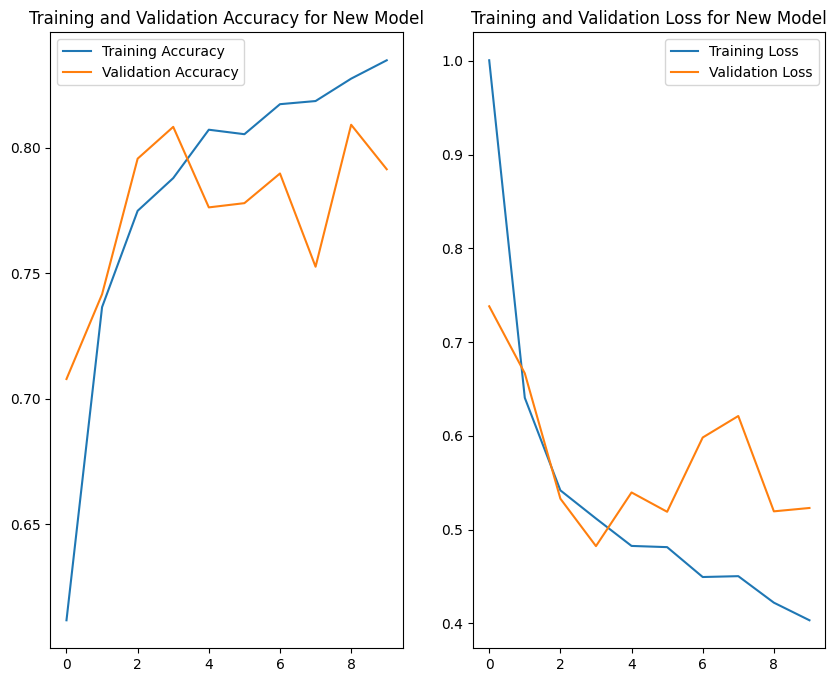

In [10]:
epochs = range(len(new_acc))

plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.plot(epochs,new_acc,label='Training Accuracy')
plt.plot(epochs,new_val_acc,label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy for New Model')

plt.subplot(1,2,2)
plt.plot(epochs,new_loss,label='Training Loss')
plt.plot(epochs,new_val_loss,label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss for New Model')
plt.show()